C:\Users\huawei\AppData\Local\Temp\ipykernel_14588\1870233921.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).replace('\u200c', '') if isinstance(x, str) else x)
C:\Users\huawei\AppData\Local\Temp\ipykernel_14588\1870233921.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).replace('\u200c', '') if isinstance(x, str) else x)
C:\Users\huawei\AppData\Local\Temp\ipykernel_14588\1870233921.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).replace('\u200c', '') if isinstance(x, str) else x)
C:\Users\huawei\AppData\Local\Temp\ipykernel_14588\1870233921.py:39: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link = sch.linkage(dist, method="single")  # 或者试试 'single'


<Figure size 3000x3000 with 0 Axes>

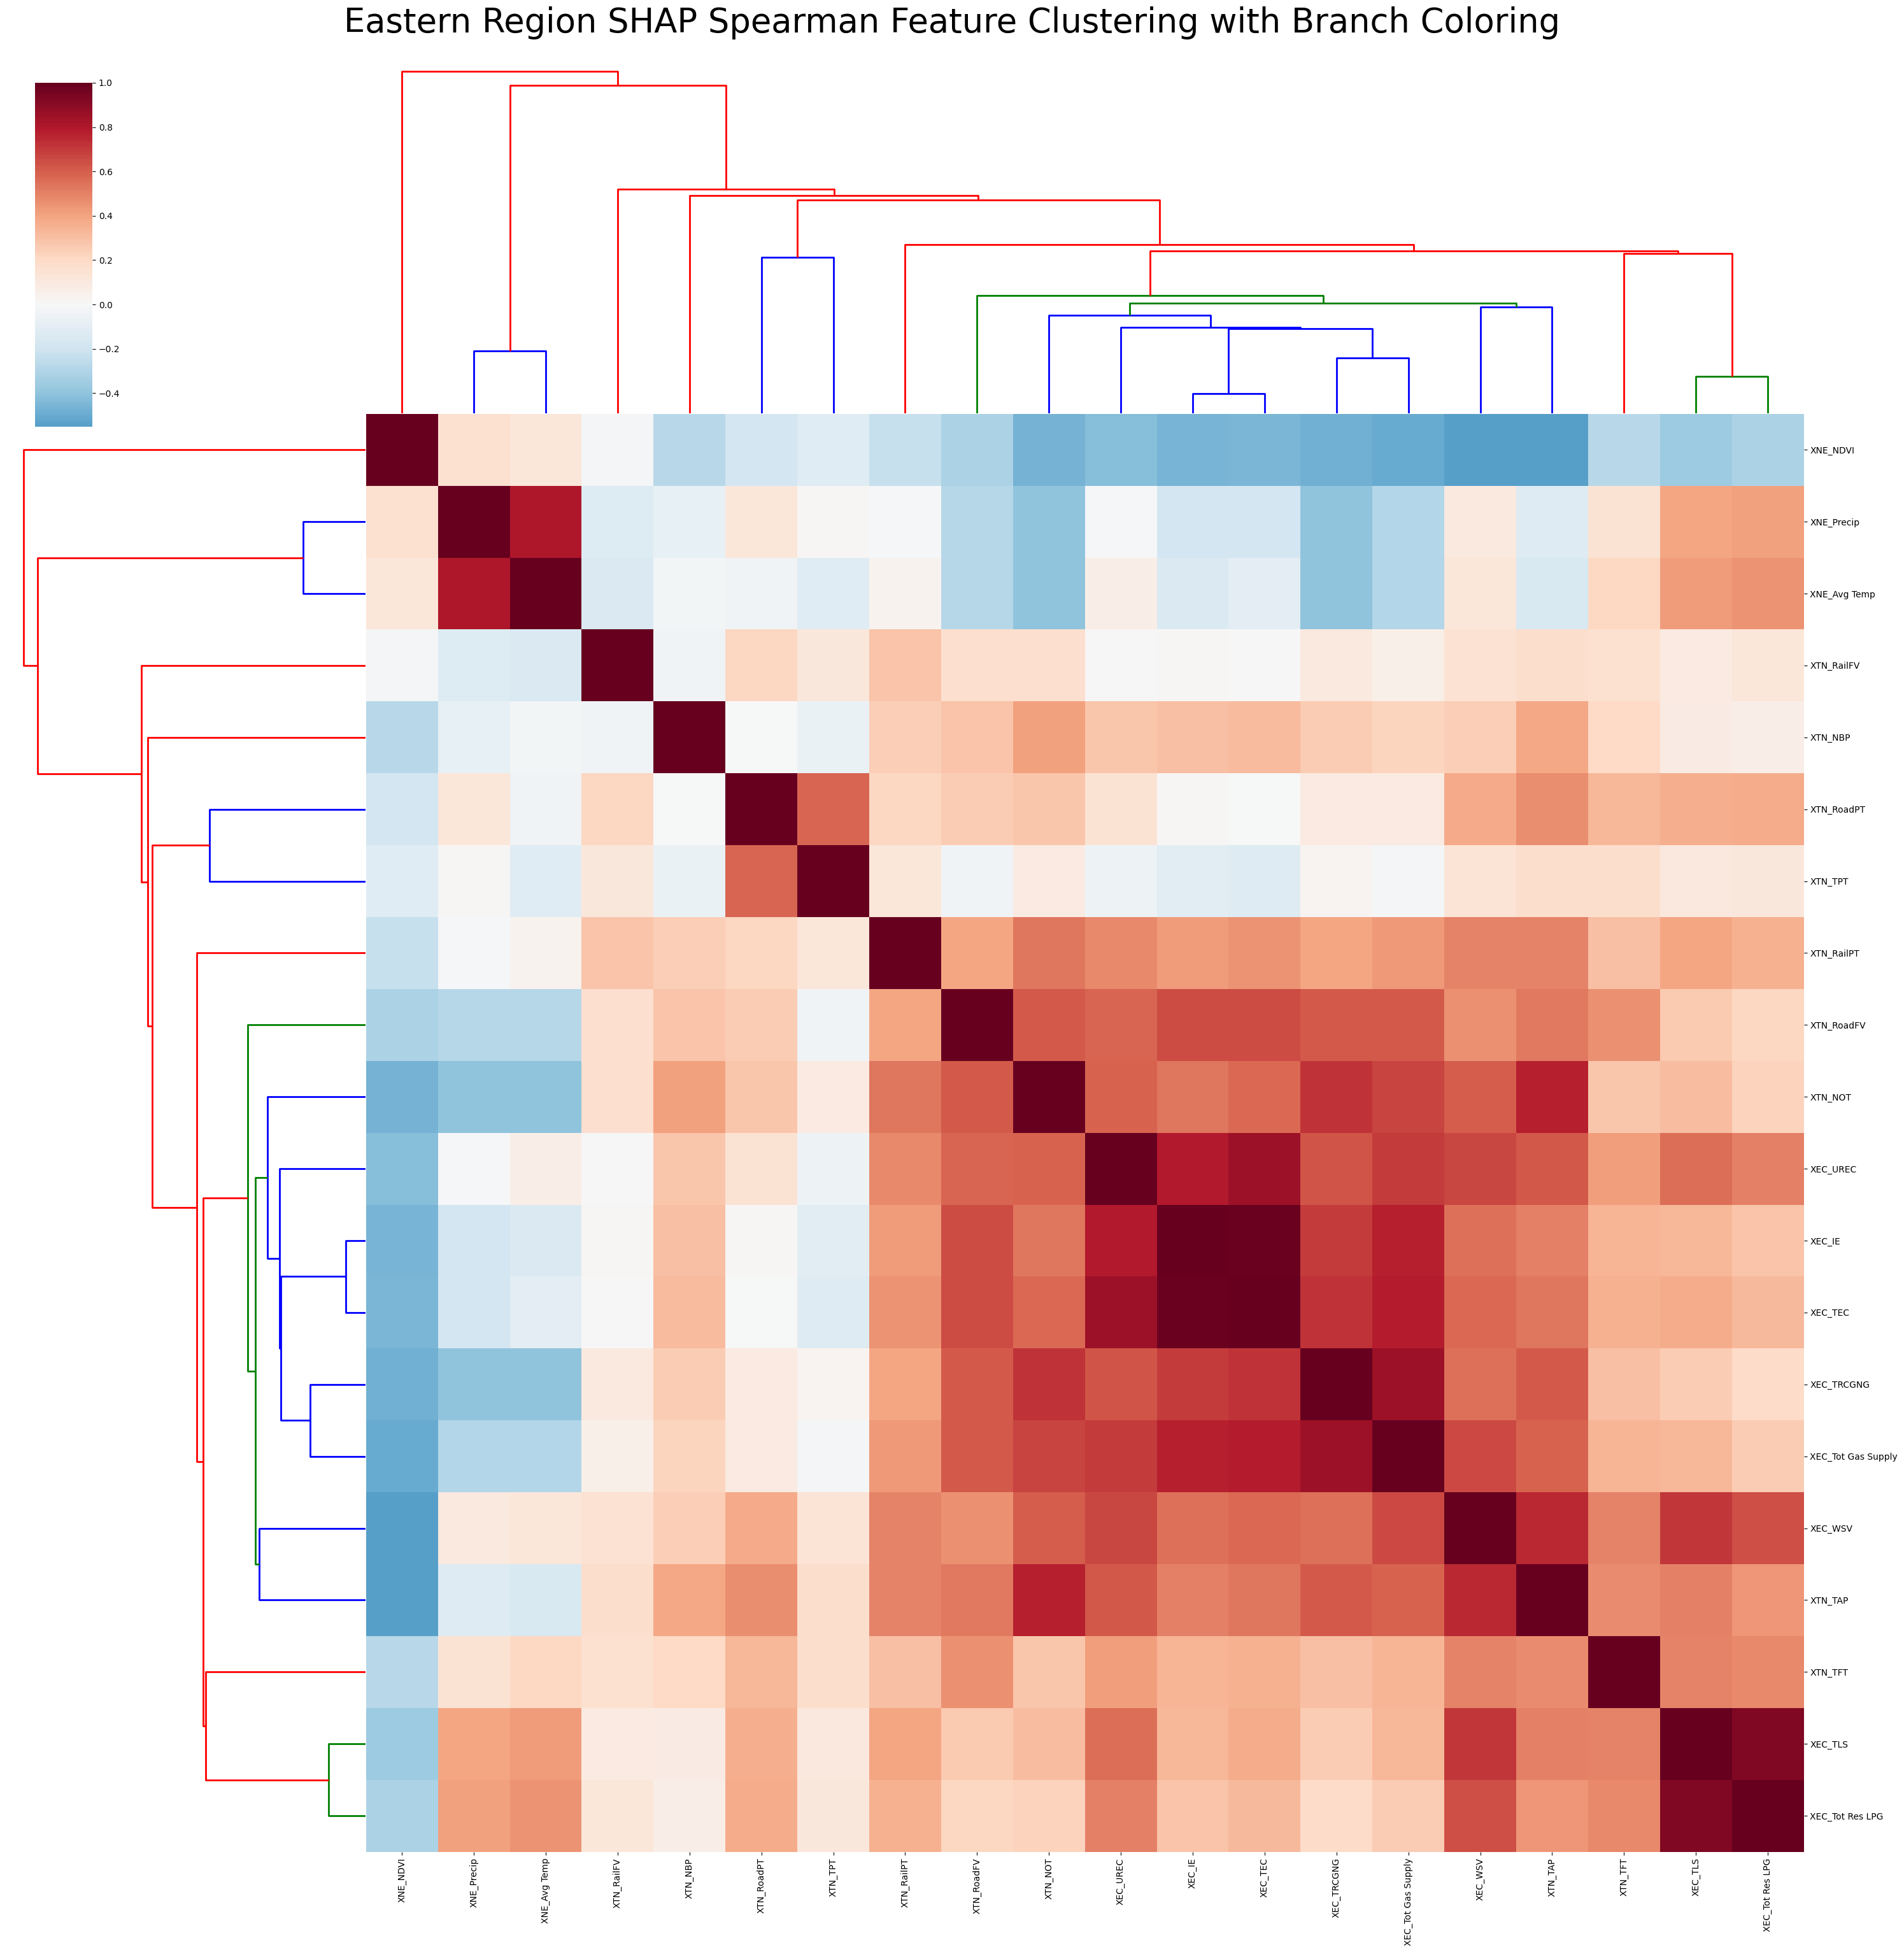

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster
from scipy.stats import spearmanr

# ———— 1. 数据预处理 ————
def preprocess_and_label(df, label):
    df = df[df['quyu'] == '东部'].drop(columns=['city', 'quyu', 'year', 'provcd', 'citytype', 'shengtype'])
    df = df.applymap(lambda x: str(x).replace('\u200c', '') if isinstance(x, str) else x)
    df = df.apply(pd.to_numeric, errors='coerce')
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(axis=0, how='any', inplace=True)
    df.dropna(axis=1, how='any', inplace=True)
    df.columns = [f"{label}_{c}" for c in df.columns]
    return df

# ———— 2. 读取并合并数据 ————
xec = pd.read_excel("XEC.xlsx")
xne = pd.read_excel("XNE.xlsx")
xtn = pd.read_excel("XTN.xlsx")

xec_e = preprocess_and_label(xec, "XEC")
xne_e = preprocess_and_label(xne, "XNE")
xtn_e = preprocess_and_label(xtn, "XTN")

common = xec_e.index.intersection(xne_e.index).intersection(xtn_e.index)
merged = xec_e.loc[common].join(xne_e.loc[common]).join(xtn_e.loc[common])

# ———— 3. 计算Spearman相关矩阵 ————
corr_mat, _ = spearmanr(merged)
dist = 1 - corr_mat  # 或者使用不同的距离计算
corr_df = pd.DataFrame(corr_mat, index=merged.columns, columns=merged.columns)

# ———— 4. 层次聚类 ————
dist = 1 - corr_df.values
link = sch.linkage(dist, method="single")  # 或者试试 'single'

# 增加聚类的数量（例如1000个）
n_clusters = 1000  
clusters = fcluster(link, t=n_clusters, criterion="maxclust")

# ———— 5. 进行树状图分支染色 ————
# 为每个特征的树状图分支指定颜色
category_colors = {
    'XEC': 'blue',
    'XNE': 'green',
    'XTN': 'red'
}

# 创建一个颜色列表，根据每个特征所在的类别赋予对应的颜色
row_colors = [category_colors[col.split('_')[0]] for col in corr_df.columns]
col_colors = [category_colors[col.split('_')[0]] for col in corr_df.columns]

# 进行树状图染色
plt.figure(figsize=(30, 30))

# 绘制树状图并为树枝染色
sns.clustermap(
    corr_df, 
    row_linkage=link, 
    col_linkage=link,
    cmap="RdBu_r",  
    center=0, 
    figsize=(30, 30),  
    cbar_pos=(0.02, .8, .03, .18),
    dendrogram_ratio=(0.2, 0.2),
    xticklabels=True,
    yticklabels=True,
    row_colors=None,  # 不显示行的颜色条
    col_colors=None,  # 不显示列的颜色条
    annot=False,  # 不显示每个单元格的数值
    tree_kws={"linewidths": 2, "colors": row_colors}  # 为树状图的树枝增加颜色
)

# 更新标题
plt.suptitle("Eastern Region SHAP Spearman Feature Clustering with Branch Coloring", y=1.02, fontsize=38)

# 显示图形
plt.show()


C:\Users\huawei\AppData\Local\Temp\ipykernel_14588\1468931704.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).replace('\u200c', '') if isinstance(x, str) else x)
C:\Users\huawei\AppData\Local\Temp\ipykernel_14588\1468931704.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).replace('\u200c', '') if isinstance(x, str) else x)
C:\Users\huawei\AppData\Local\Temp\ipykernel_14588\1468931704.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).replace('\u200c', '') if isinstance(x, str) else x)
C:\Users\huawei\AppData\Local\Temp\ipykernel_14588\1468931704.py:39: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link = sch.linkage(dist, method="single")  # 或者试试 'single'


<Figure size 3000x3000 with 0 Axes>

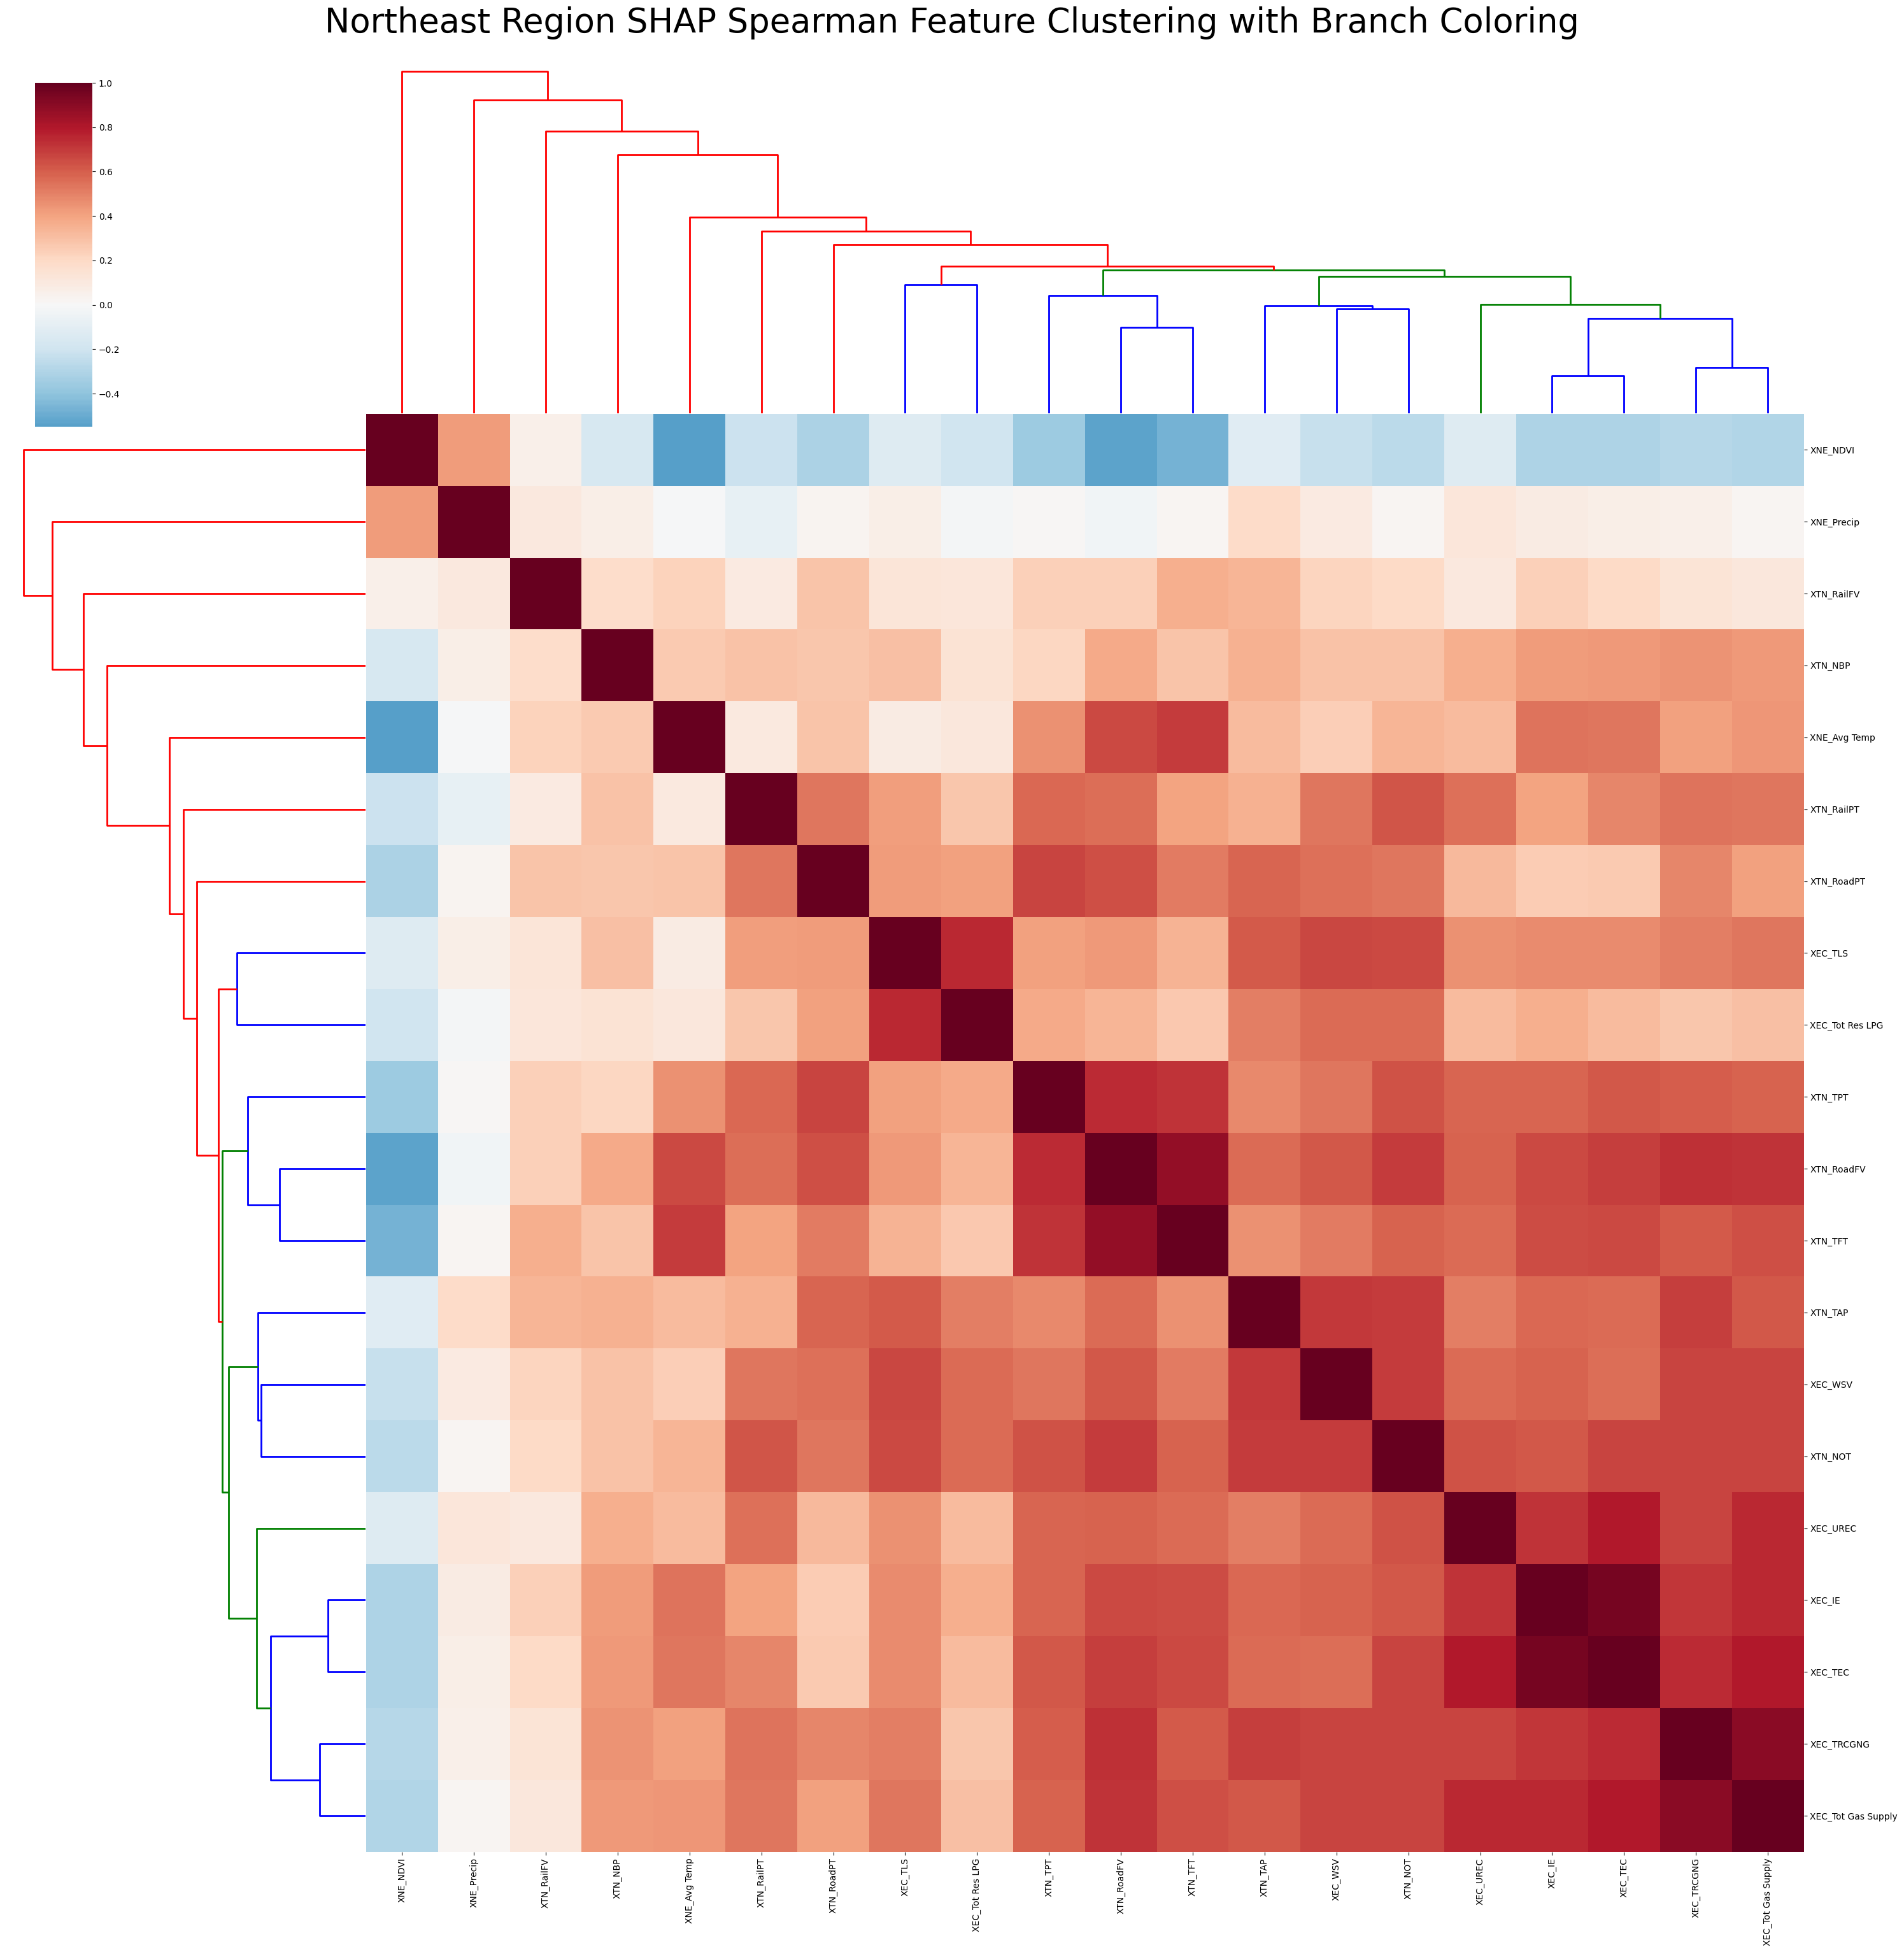

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster
from scipy.stats import spearmanr

# ———— 1. 数据预处理 ————
def preprocess_and_label(df, label):
    df = df[df['quyu'] == '东北'].drop(columns=['city', 'quyu', 'year', 'provcd', 'citytype', 'shengtype'])
    df = df.applymap(lambda x: str(x).replace('\u200c', '') if isinstance(x, str) else x)
    df = df.apply(pd.to_numeric, errors='coerce')
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(axis=0, how='any', inplace=True)
    df.dropna(axis=1, how='any', inplace=True)
    df.columns = [f"{label}_{c}" for c in df.columns]
    return df

# ———— 2. 读取并合并数据 ————
xec = pd.read_excel("XEC.xlsx")
xne = pd.read_excel("XNE.xlsx")
xtn = pd.read_excel("XTN.xlsx")

xec_e = preprocess_and_label(xec, "XEC")
xne_e = preprocess_and_label(xne, "XNE")
xtn_e = preprocess_and_label(xtn, "XTN")

common = xec_e.index.intersection(xne_e.index).intersection(xtn_e.index)
merged = xec_e.loc[common].join(xne_e.loc[common]).join(xtn_e.loc[common])

# ———— 3. 计算Spearman相关矩阵 ————
corr_mat, _ = spearmanr(merged)
dist = 1 - corr_mat  # 或者使用不同的距离计算
corr_df = pd.DataFrame(corr_mat, index=merged.columns, columns=merged.columns)

# ———— 4. 层次聚类 ————
dist = 1 - corr_df.values
link = sch.linkage(dist, method="single")  # 或者试试 'single'

# 增加聚类的数量（例如1000个）
n_clusters = 1000  
clusters = fcluster(link, t=n_clusters, criterion="maxclust")

# ———— 5. 进行树状图分支染色 ————
# 为每个特征的树状图分支指定颜色
category_colors = {
    'XEC': 'blue',
    'XNE': 'green',
    'XTN': 'red'
}

# 创建一个颜色列表，根据每个特征所在的类别赋予对应的颜色
row_colors = [category_colors[col.split('_')[0]] for col in corr_df.columns]
col_colors = [category_colors[col.split('_')[0]] for col in corr_df.columns]

# 进行树状图染色
plt.figure(figsize=(30, 30))

# 绘制树状图并为树枝染色
sns.clustermap(
    corr_df, 
    row_linkage=link, 
    col_linkage=link,
    cmap="RdBu_r",  
    center=0, 
    figsize=(30, 30),  
    cbar_pos=(0.02, .8, .03, .18),
    dendrogram_ratio=(0.2, 0.2),
    xticklabels=True,
    yticklabels=True,
    row_colors=None,  # 不显示行的颜色条
    col_colors=None,  # 不显示列的颜色条
    annot=False,  # 不显示每个单元格的数值
    tree_kws={"linewidths": 2, "colors": row_colors}  # 为树状图的树枝增加颜色
)

# 更新标题
plt.suptitle("Northeast Region SHAP Spearman Feature Clustering with Branch Coloring", y=1.02, fontsize=38)

# 显示图形
plt.show()


C:\Users\huawei\AppData\Local\Temp\ipykernel_14588\3541139930.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).replace('\u200c', '') if isinstance(x, str) else x)
C:\Users\huawei\AppData\Local\Temp\ipykernel_14588\3541139930.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).replace('\u200c', '') if isinstance(x, str) else x)
C:\Users\huawei\AppData\Local\Temp\ipykernel_14588\3541139930.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).replace('\u200c', '') if isinstance(x, str) else x)
C:\Users\huawei\AppData\Local\Temp\ipykernel_14588\3541139930.py:39: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link = sch.linkage(dist, method="single")  # 或者试试 'single'


<Figure size 3000x3000 with 0 Axes>

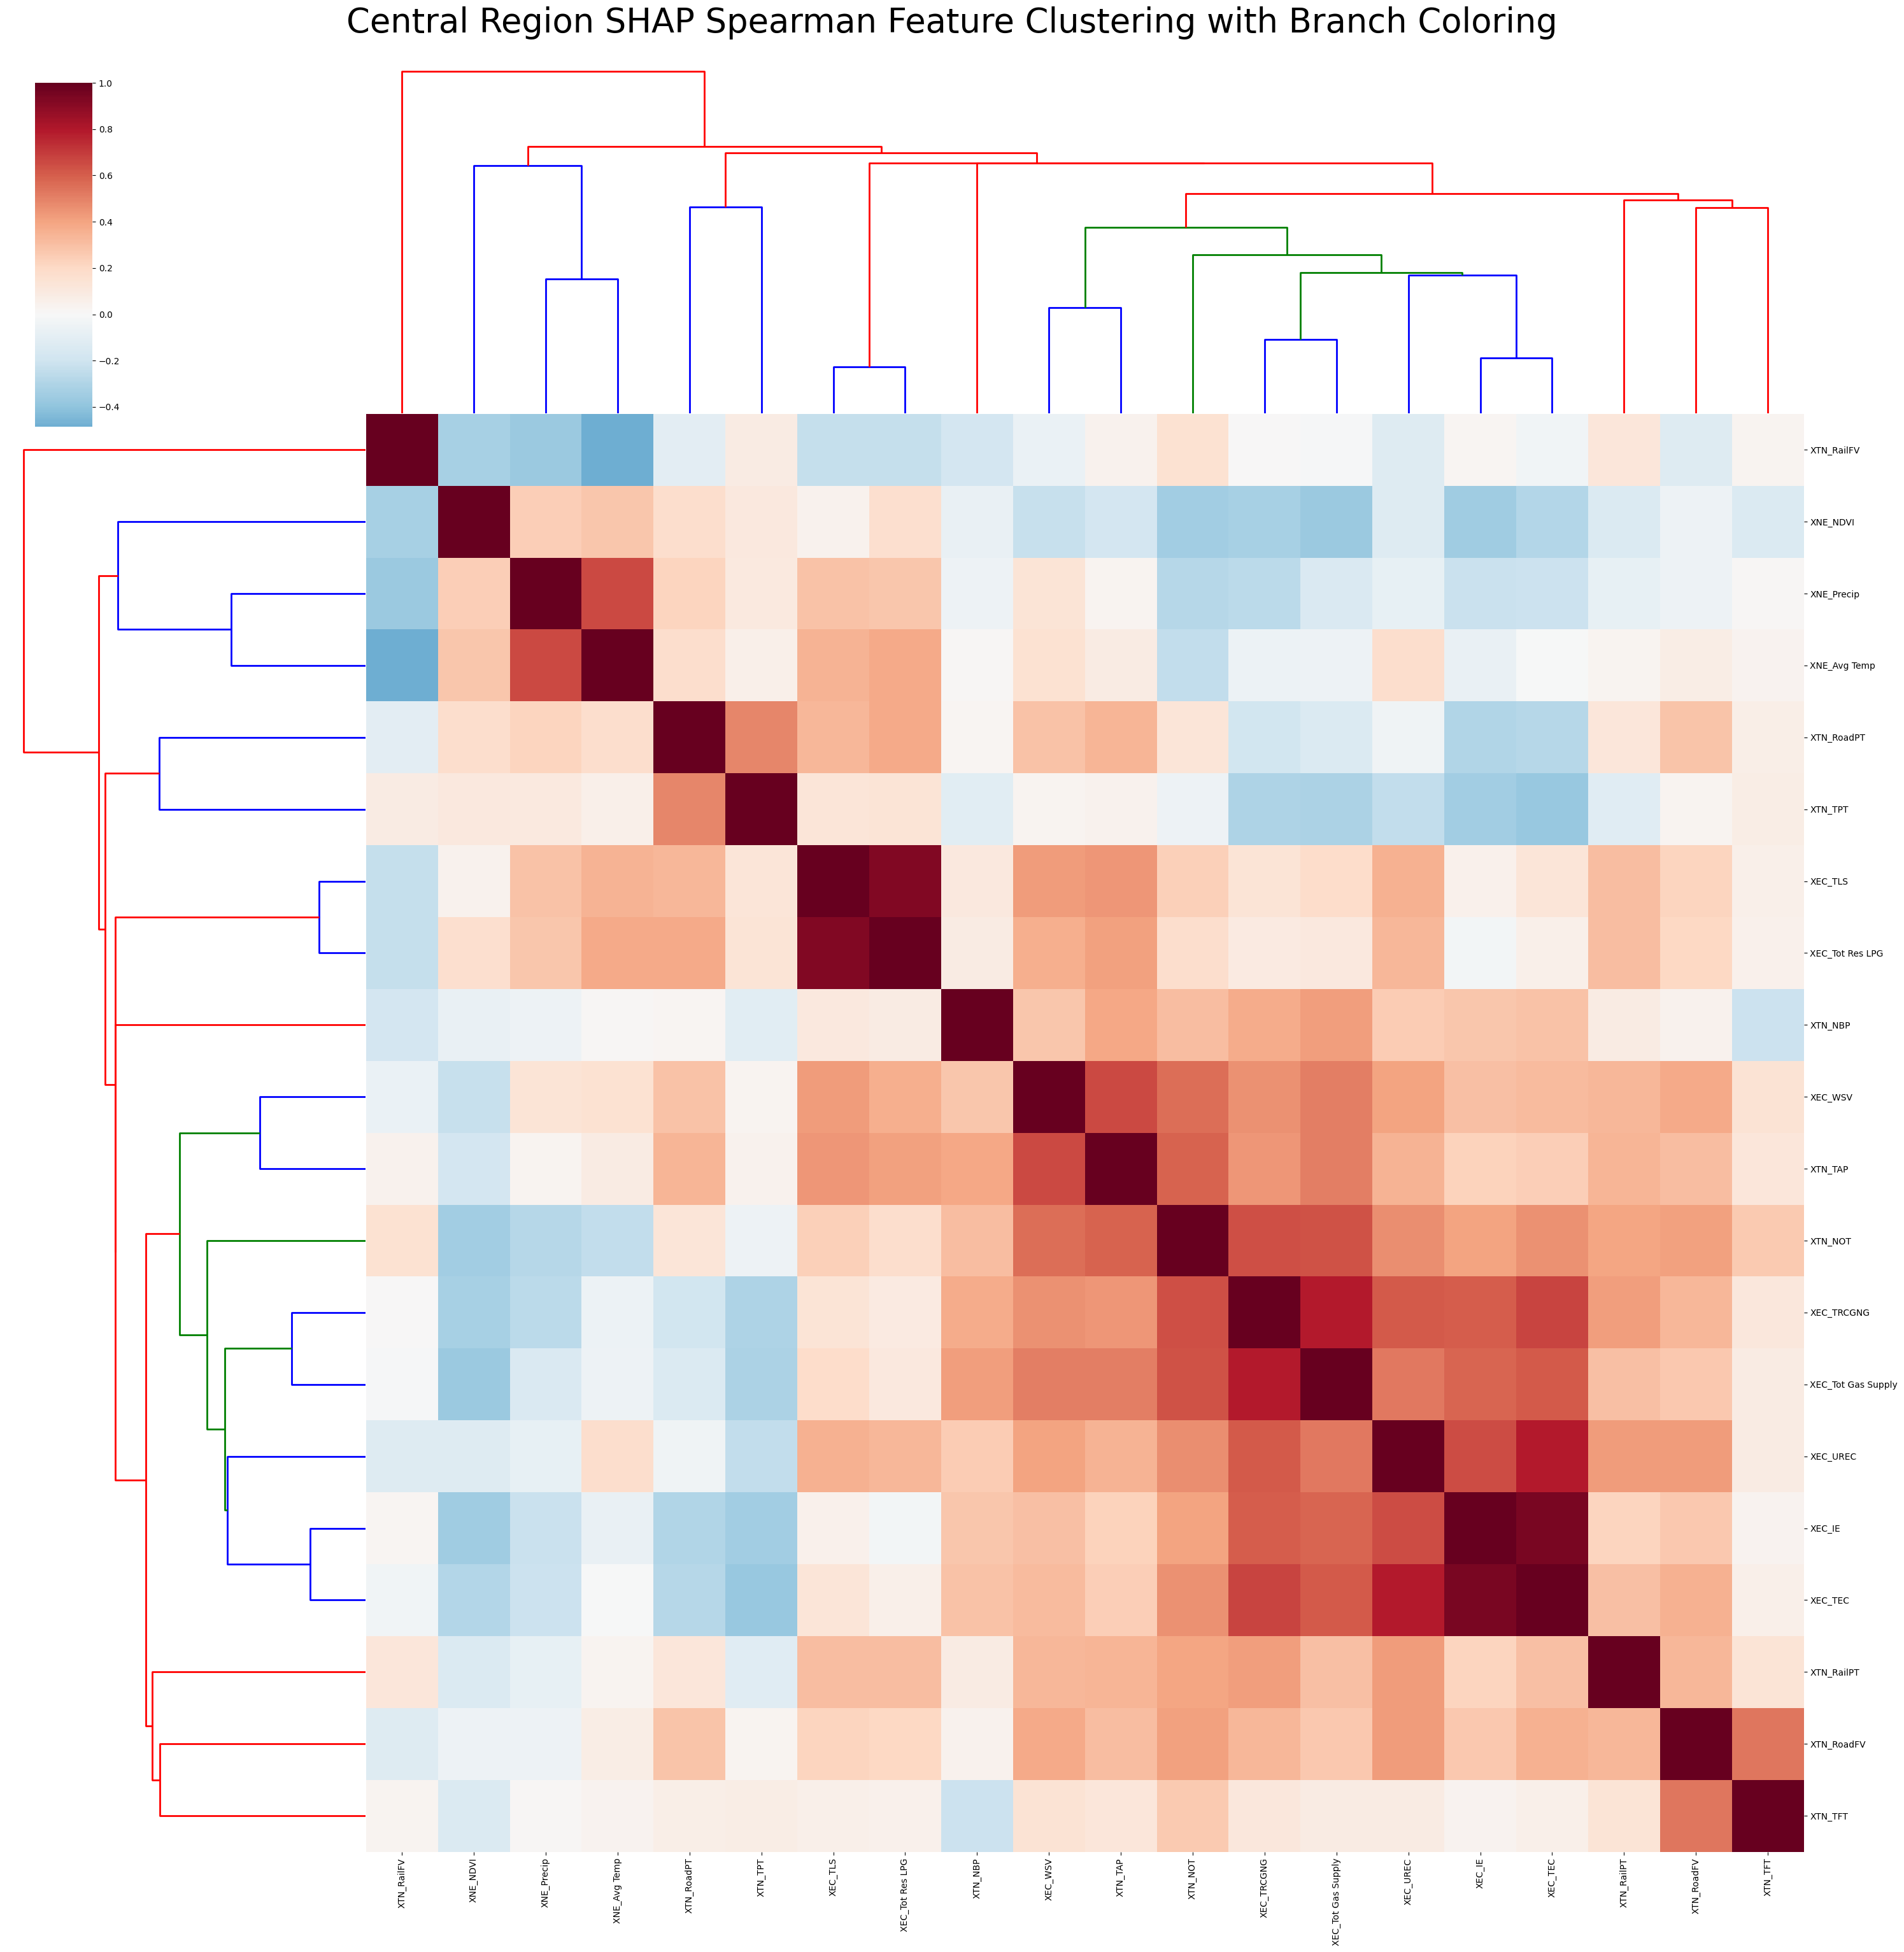

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster
from scipy.stats import spearmanr

# ———— 1. 数据预处理 ————
def preprocess_and_label(df, label):
    df = df[df['quyu'] == '中部'].drop(columns=['city', 'quyu', 'year', 'provcd', 'citytype', 'shengtype'])
    df = df.applymap(lambda x: str(x).replace('\u200c', '') if isinstance(x, str) else x)
    df = df.apply(pd.to_numeric, errors='coerce')
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(axis=0, how='any', inplace=True)
    df.dropna(axis=1, how='any', inplace=True)
    df.columns = [f"{label}_{c}" for c in df.columns]
    return df

# ———— 2. 读取并合并数据 ————
xec = pd.read_excel("XEC.xlsx")
xne = pd.read_excel("XNE.xlsx")
xtn = pd.read_excel("XTN.xlsx")

xec_e = preprocess_and_label(xec, "XEC")
xne_e = preprocess_and_label(xne, "XNE")
xtn_e = preprocess_and_label(xtn, "XTN")

common = xec_e.index.intersection(xne_e.index).intersection(xtn_e.index)
merged = xec_e.loc[common].join(xne_e.loc[common]).join(xtn_e.loc[common])

# ———— 3. 计算Spearman相关矩阵 ————
corr_mat, _ = spearmanr(merged)
dist = 1 - corr_mat  # 或者使用不同的距离计算
corr_df = pd.DataFrame(corr_mat, index=merged.columns, columns=merged.columns)

# ———— 4. 层次聚类 ————
dist = 1 - corr_df.values
link = sch.linkage(dist, method="single")  # 或者试试 'single'

# 增加聚类的数量（例如1000个）
n_clusters = 1000  
clusters = fcluster(link, t=n_clusters, criterion="maxclust")

# ———— 5. 进行树状图分支染色 ————
# 为每个特征的树状图分支指定颜色
category_colors = {
    'XEC': 'blue',
    'XNE': 'green',
    'XTN': 'red'
}

# 创建一个颜色列表，根据每个特征所在的类别赋予对应的颜色
row_colors = [category_colors[col.split('_')[0]] for col in corr_df.columns]
col_colors = [category_colors[col.split('_')[0]] for col in corr_df.columns]

# 进行树状图染色
plt.figure(figsize=(30, 30))

# 绘制树状图并为树枝染色
sns.clustermap(
    corr_df, 
    row_linkage=link, 
    col_linkage=link,
    cmap="RdBu_r",  
    center=0, 
    figsize=(30, 30),  
    cbar_pos=(0.02, .8, .03, .18),
    dendrogram_ratio=(0.2, 0.2),
    xticklabels=True,
    yticklabels=True,
    row_colors=None,  # 不显示行的颜色条
    col_colors=None,  # 不显示列的颜色条
    annot=False,  # 不显示每个单元格的数值
    tree_kws={"linewidths": 2, "colors": row_colors}  # 为树状图的树枝增加颜色
)

# 更新标题
plt.suptitle("Central Region SHAP Spearman Feature Clustering with Branch Coloring", y=1.02, fontsize=38)

# 显示图形
plt.show()


C:\Users\huawei\AppData\Local\Temp\ipykernel_14588\2549652031.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).replace('\u200c', '') if isinstance(x, str) else x)
C:\Users\huawei\AppData\Local\Temp\ipykernel_14588\2549652031.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).replace('\u200c', '') if isinstance(x, str) else x)
C:\Users\huawei\AppData\Local\Temp\ipykernel_14588\2549652031.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).replace('\u200c', '') if isinstance(x, str) else x)
C:\Users\huawei\AppData\Local\Temp\ipykernel_14588\2549652031.py:39: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link = sch.linkage(dist, method="single")  # 或者试试 'single'


<Figure size 3000x3000 with 0 Axes>

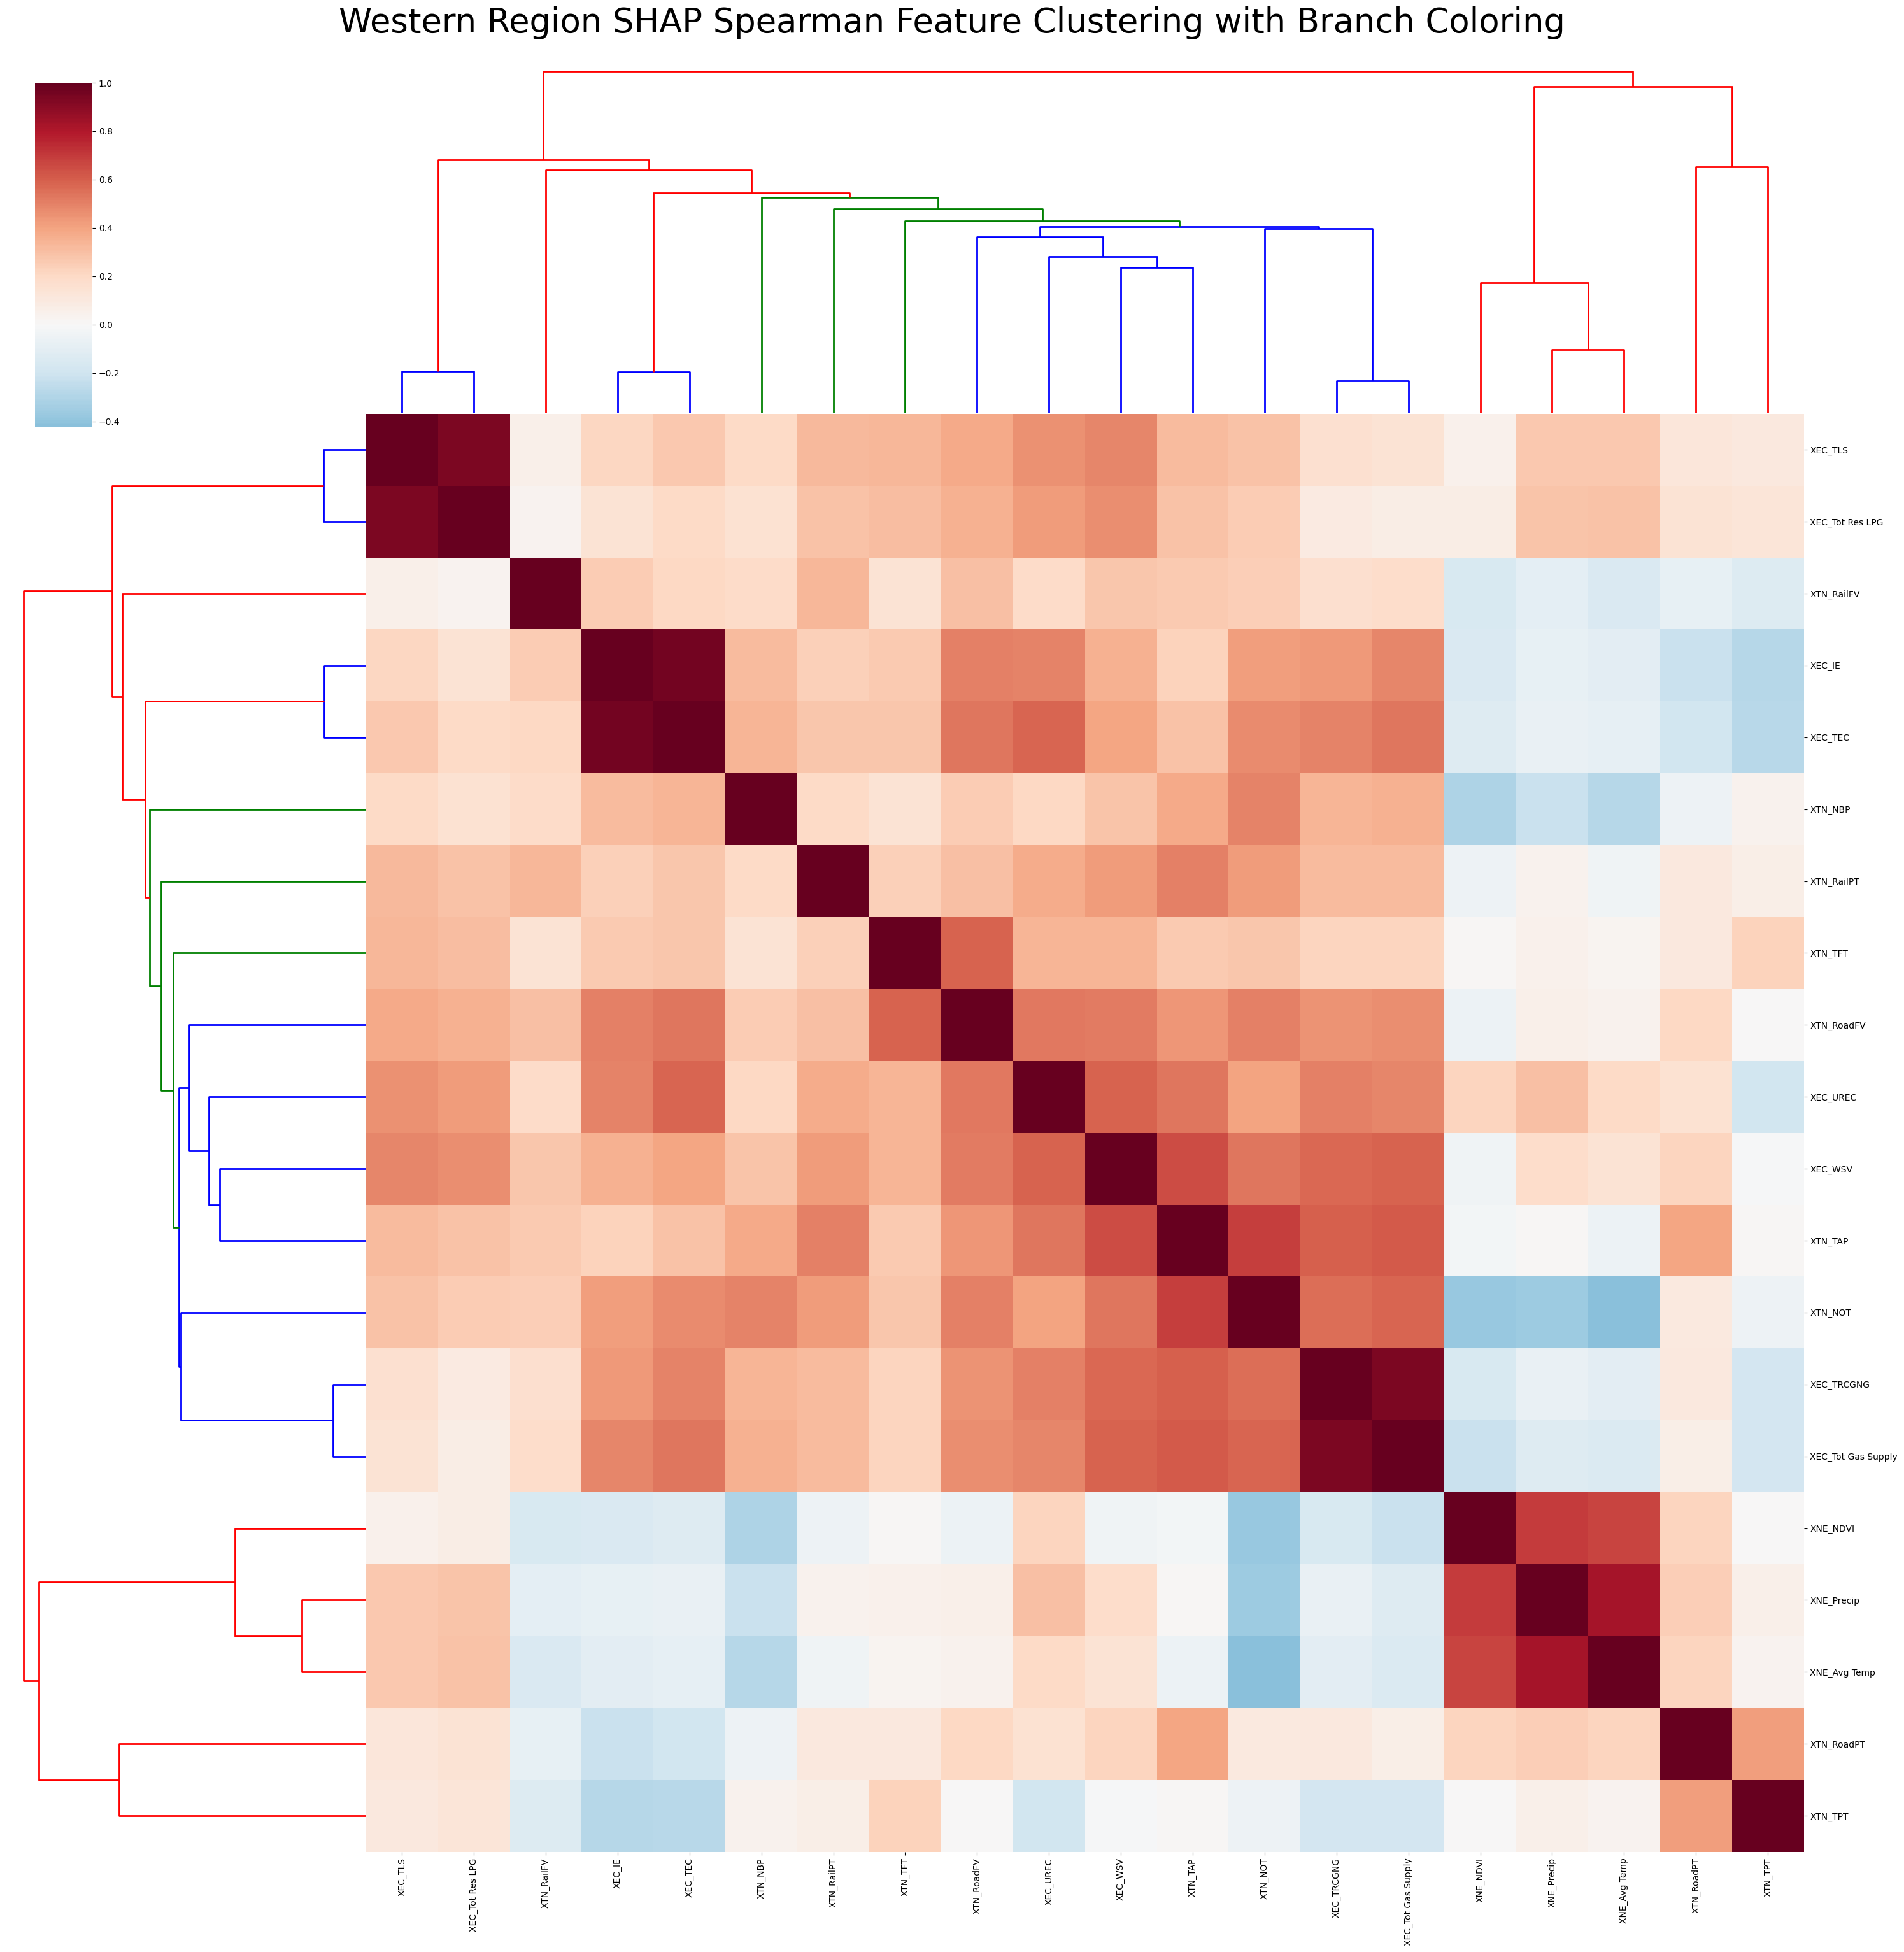

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster
from scipy.stats import spearmanr

# ———— 1. 数据预处理 ————
def preprocess_and_label(df, label):
    df = df[df['quyu'] == '西部'].drop(columns=['city', 'quyu', 'year', 'provcd', 'citytype', 'shengtype'])
    df = df.applymap(lambda x: str(x).replace('\u200c', '') if isinstance(x, str) else x)
    df = df.apply(pd.to_numeric, errors='coerce')
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(axis=0, how='any', inplace=True)
    df.dropna(axis=1, how='any', inplace=True)
    df.columns = [f"{label}_{c}" for c in df.columns]
    return df

# ———— 2. 读取并合并数据 ————
xec = pd.read_excel("XEC.xlsx")
xne = pd.read_excel("XNE.xlsx")
xtn = pd.read_excel("XTN.xlsx")

xec_e = preprocess_and_label(xec, "XEC")
xne_e = preprocess_and_label(xne, "XNE")
xtn_e = preprocess_and_label(xtn, "XTN")

common = xec_e.index.intersection(xne_e.index).intersection(xtn_e.index)
merged = xec_e.loc[common].join(xne_e.loc[common]).join(xtn_e.loc[common])

# ———— 3. 计算Spearman相关矩阵 ————
corr_mat, _ = spearmanr(merged)
dist = 1 - corr_mat  # 或者使用不同的距离计算
corr_df = pd.DataFrame(corr_mat, index=merged.columns, columns=merged.columns)

# ———— 4. 层次聚类 ————
dist = 1 - corr_df.values
link = sch.linkage(dist, method="single")  # 或者试试 'single'

# 增加聚类的数量（例如1000个）
n_clusters = 1000  
clusters = fcluster(link, t=n_clusters, criterion="maxclust")

# ———— 5. 进行树状图分支染色 ————
# 为每个特征的树状图分支指定颜色
category_colors = {
    'XEC': 'blue',
    'XNE': 'green',
    'XTN': 'red'
}

# 创建一个颜色列表，根据每个特征所在的类别赋予对应的颜色
row_colors = [category_colors[col.split('_')[0]] for col in corr_df.columns]
col_colors = [category_colors[col.split('_')[0]] for col in corr_df.columns]

# 进行树状图染色
plt.figure(figsize=(30, 30))

# 绘制树状图并为树枝染色
sns.clustermap(
    corr_df, 
    row_linkage=link, 
    col_linkage=link,
    cmap="RdBu_r",  
    center=0, 
    figsize=(30, 30),  
    cbar_pos=(0.02, .8, .03, .18),
    dendrogram_ratio=(0.2, 0.2),
    xticklabels=True,
    yticklabels=True,
    row_colors=None,  # 不显示行的颜色条
    col_colors=None,  # 不显示列的颜色条
    annot=False,  # 不显示每个单元格的数值
    tree_kws={"linewidths": 2, "colors": row_colors}  # 为树状图的树枝增加颜色
)

# 更新标题
plt.suptitle("Western Region SHAP Spearman Feature Clustering with Branch Coloring", y=1.02, fontsize=38)

# 显示图形
plt.show()
